<h1 style='color:blue' align='center'>Internship Task</h1>
<h3 style='color:red' align='center'>Customer Churn Prediction </h3>

### 1.Data cleaning including missing values, outliers andmulti collinearity.
- In the given dataframe there is some missing values in TotalCharges columns which can be removed form the dataset
- As our model works on numeric values the value are replaced 'yes' with 1 and 'No' with 0 
- On rest of the categorical values One hot encoding is performed

### 2.Describe your predictive churn model in elaboration.
- I have used the AAN model for the churn prediction.
- It is having the accuracy of 79% which can be impoved by some changes in parameters.
- I have used 20% of the dataset for the testing 
- In my ANN there is a three layer network
    - 1) Layer 1: It is a input layer with 26 neurones ,it a densely connected with hidden layer
    - 2) Layer 2: It is a Hidden layer with 20 neurones , here we have used reLU activation function
    - 3) Layer 3L It is a Output layer which give the value between 0 and 1 for the churn predicion, here we have used sigmoid activation function
- In my  model i have used adam optimizer with binary_crossentropy as a loss function and 100 epochs


### 3.How did you select variables to be included in the model?
- CustomerID colum is droped because it is not required for model
- Rest of the columns have taken in Independent variable X excluding Churn column
- Churn column have been taken as the Dependent variable y
- X_train,X_test,y_train,y_test are training and testing variables with the test size of 0.2(i.e. 20% of the dataset)


### 4.Demonstrate the performance of the model by usingbest set of tools.
- I have used the ANN which is 79% accurate 
(The accuracy of the model can be increased by changing the parameters)

### 5.What are the key factors that predict customer churn?
- Key factors that predict customer churn are:
- 1) how customers use the product
- 2) customers interactions with the company – via support
- 3) customer sentiment
- 4) Customer requirements

### 6.Do these factors make sense? If yes, How? If not,How not?
Yes these all factors make sense 
- tenure : The old customer are not likely to churn
- for factors like Internet service ,online security ,Online Backup ,Device Protection : If this features are provided to customer the customer is not likely to churn
- The customer will churn if in case of contact of month-to-month
- Also if the monthly charge is high then also customer are more like to churn

### 7.What kind of offers should be avail to customers to encourage them to remain with company?
- Encourage customers to set up automatic payments either through a bank transfer or credit card. 
- Understanding the customer requirment and provide offers in service with the low Monthly Charges
- Pretty clear cut to have the customers on a 1 or 2-year contract with some offers.

### 8. Assuming these actions have been implemented , how would you determine if they work?
- I would determie with the churn rate

In [23]:
# importing modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
# load dataframe
df= pd.read_csv('churn.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


#### data exploration


In [25]:
# droping customerID as it is not in use for our model
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [66]:
# checking the null value
df.columns[df.isnull().any()]

Index(['TotalCharges'], dtype='object')

TotalCharges columns have null values

In [67]:
df[df['TotalCharges'].isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [59]:
df.shape

(7043, 20)

### Droping nan values rows

In [68]:
df1=df[~df.TotalCharges.isnull()]
df1.shape

(7032, 20)

In [69]:
# checking again
df1.columns[df1.isnull().any()]

Index([], dtype='object')

## Data Cleaning

In [76]:
# Checking the unique values in different columns with object dtype
for column in df1:
    if df[column].dtype=='object':
        print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


now replacing the value for
- No internet,phone services in No catogary
- No with 0
- Yes with 1

In [77]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\GAURAV\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [78]:
# findng columns if yes or no 
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\GAURAV\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


 replacing 
 female and male with 1 and 0

In [80]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


## One hot encoding for categorical columns

In [81]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [82]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2957,1,0,0,0,4,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3493,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1540,0,0,1,1,63,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
5576,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1030,1,0,1,1,50,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [83]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### scaling 

In [84]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [85]:
# Checking for unique values
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### Now our dataframe is ready for training and testing 

## Data Visualization


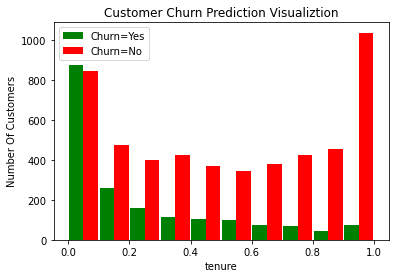

In [91]:
# customer not leaving based on tensure
tenure_churn_no = df2[df2.Churn==0].tenure
# customer not leaving based on tensure
tenure_churn_yes = df2[df2.Churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

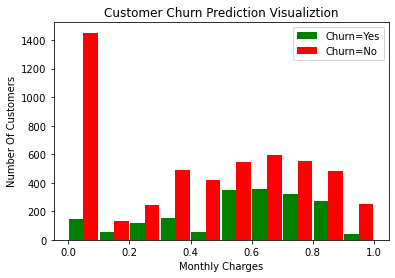

In [92]:
# customer not leaving based on MonthlyCharges
mc_churn_no = df2[df2.Churn==0].MonthlyCharges
# customer leaving based on MonthlyCharges
mc_churn_yes = df2[df2.Churn==1].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# training and testing variable

In [105]:
# independent variable
X = df2.drop('Churn',axis='columns')
# dependent variable
y= df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [106]:
X_train.shape

(5625, 26)

In [107]:
X_test.shape

(1407, 26)

In [108]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


# Building a ANN model 

In [109]:
len(X_train.columns)

26

In [142]:
import tensorflow as tf
from tensorflow import keras

# creating the model
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'), #input layear with 26 neurones and one hidden layer with 20 neurones
    keras.layers.Dense(1,activation='sigmoid')                     # output layaer
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 892us/step - loss: 0.6196 - accuracy: 0.6500
Epoch 2/100
176/176 [==============================] - 0s 962us/step - loss: 0.4491 - accuracy: 0.7868
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7927
Epoch 4/100
176/176 [==============================] - 0s 952us/step - loss: 0.4215 - accuracy: 0.7975
Epoch 5/100
176/176 [==============================] - 0s 985us/step - loss: 0.4181 - accuracy: 0.8005
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8007
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 997us/step - loss: 0.4132 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8039
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.411

176/176 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8204
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8199
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8196
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8192
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8204
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8174
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8208
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8208
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8199
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 

In [143]:
# evaluating model
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7882


[0.4533945322036743, 0.7882018685340881]

## predicting

In [144]:
y_predicted=model.predict(X_test)
y_predicted[:5]

array([[0.17723817],
       [0.47508848],
       [0.01140845],
       [0.78685224],
       [0.45814946]], dtype=float32)

In [145]:
# convert y_predicted in 1D array and values in zero to one
y_pred = []
for i in y_predicted:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [146]:
t_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

#### Checking accuracy

In [147]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



## Confusion matrix

Text(69.0, 0.5, 'Truth')

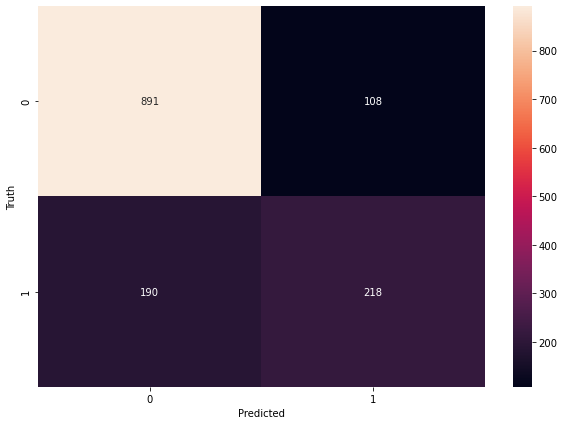

In [148]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')